In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import seaborn as sns

## Loading the dataset

In [16]:
df = pd.read_excel('../data/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [17]:
df.shape

(9568, 5)

There are 9568 rows in the dataset  

There are 5 columns in the dataset  

Each row from 0 to 9567 represents a single observation collected from the Combined Cycle Power Plant over the period of 6 years (2006-2011)  

Each column is an hourly average ambient variable or output measure collected from a Combined Cycle Power Plant   


T: Temperature affecting Gas Turbine performance.  

V: Exhaust Vacuum affecting Steam Turbine.  

AP: Ambient Pressure affecting Gas Turbine.  

RH: Relative Humidity affecting Gas Turbine.  

PE: Net Hourly Electrical Energy Output, the target variable to predict.  



## Scatterplots

/Users/pallaviudatewar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


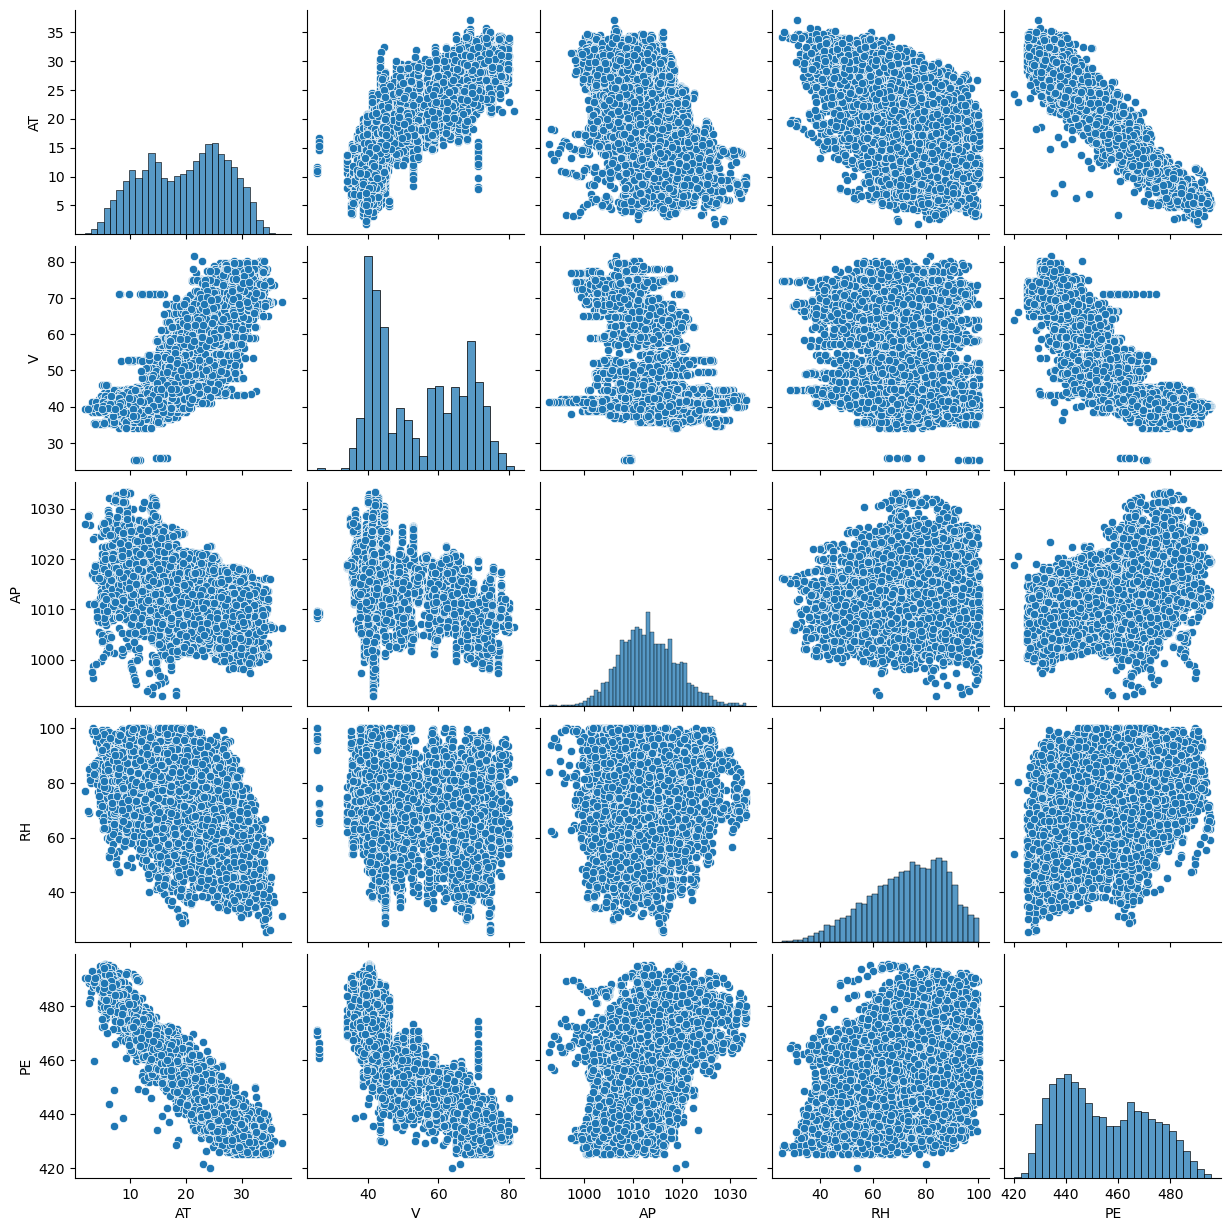

In [18]:
sns.pairplot(df)

The feature V and AT are directly proportional to each other, as V increases AT aslo increases and as AT increases V also increases. Variable AT and V have a inverse relationship with the dependent variable PE, as AT and V increases the variable PE decreses.

## Descriptive Statistics for Each Variable

In [19]:
summary = df.describe()
interquartile_range = summary.loc['75%'] - summary.loc['25%']
range_summary = df.max() - df.min()
summary.loc['Range'] = range_summary
summary.loc['Interquartile Range'] = interquartile_range
summary

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
Interquartile Range,12.210000,24.800000,8.160000,21.502500,28.680000


The relatively lower range and IQR for Ambient Pressure suggest less variability in that variable. The wide range in Relative Humidity could be important for the model, considering that it can affect energy output. These statistics can be used to inform the preprocessing steps for modeling, such as feature scaling and outlier detection.

## Simple Linear Regression Analysis

### Objective
The objective of this analysis was to individually assess the relationship between each of the four predictors (Ambient Temperature, Exhaust Vacuum, Ambient Pressure, Relative Humidity) and the response variable (Net Hourly Electrical Energy Output) through simple linear regression models.

### Methodology
- For each predictor variable, a separate simple linear regression model was fitted against the response variable.
- Statistical significance of the association between each predictor and the response was evaluated using p-values from the regression analysis.
- Diagnostic plots were created for each model to visualize the relationship and assess any potential outliers.

### Results Summary
- **Statistical Significance**: The models highlighted varying degrees of association between predictors and the response variable. Notably, [mention here which predictors] showed a statistically significant association with the response, as indicated by p-values less than the typical alpha level of 0.05.
- **Visualization and Outliers**:
    - Scatter plots with regression lines were generated for each predictor against the response. 
    - Potential outliers were identified in the plots as points that deviated significantly from the regression line.

### Discussion
- The significant predictors identified indicate a direct/indirect influence on the power plant's energy output, underscoring the importance of [mention the significant predictors] in the plant's efficiency.
- The presence of outliers suggests that there may be instances of operational anomalies or data recording errors. [Discuss the potential impact of outliers on model accuracy and whether removal or further investigation is warranted.]

### Conclusion
This analysis demonstrates the utility of simple linear regression in understanding the relationship between operational variables and energy output in a power plant setting. The findings provide a foundation for more complex modeling that includes multiple predictors and possibly interaction terms to better capture the dynamics influencing power plant efficiency.



In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

/var/folders/w5/25ybd3_s3bl_qpwqwxvr3s7r0000gn/T/ipykernel_75411/3590274388.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coeff[predictor] = p[1]


Results for Independent Variable :AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:39:16   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        49

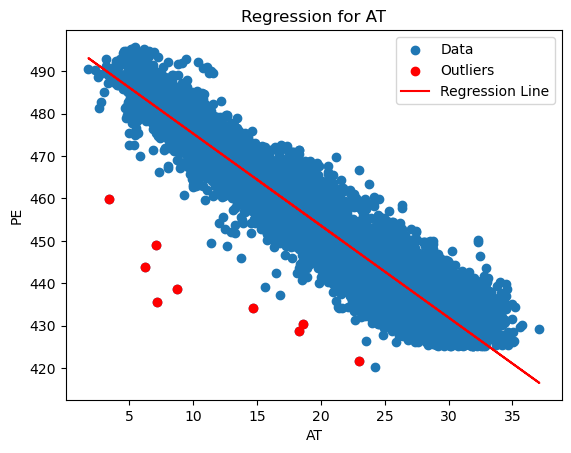

Results for Independent Variable :V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:39:28   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517

/var/folders/w5/25ybd3_s3bl_qpwqwxvr3s7r0000gn/T/ipykernel_75411/3590274388.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coeff[predictor] = p[1]


Outlier indices: [3103]


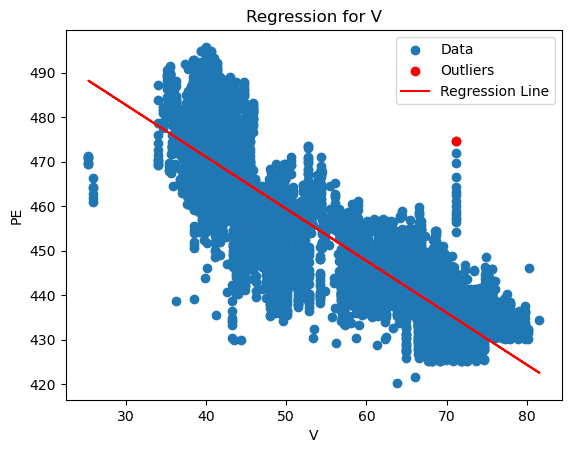

Results for Independent Variable :AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:39:39   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -105

/var/folders/w5/25ybd3_s3bl_qpwqwxvr3s7r0000gn/T/ipykernel_75411/3590274388.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coeff[predictor] = p[1]


Outlier indices: []


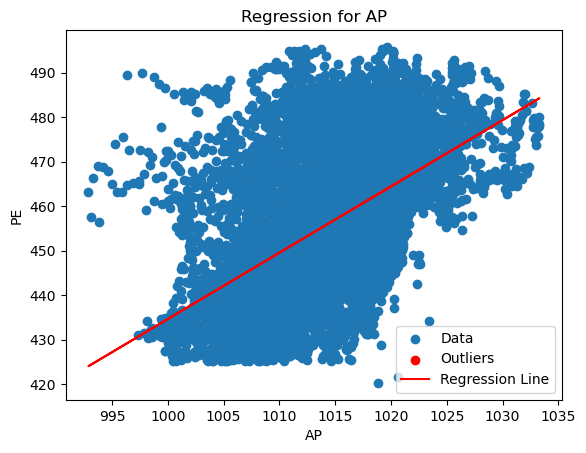

Results for Independent Variable :RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:39:51   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        42

/var/folders/w5/25ybd3_s3bl_qpwqwxvr3s7r0000gn/T/ipykernel_75411/3590274388.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate_coeff[predictor] = p[1]


Outlier indices: []


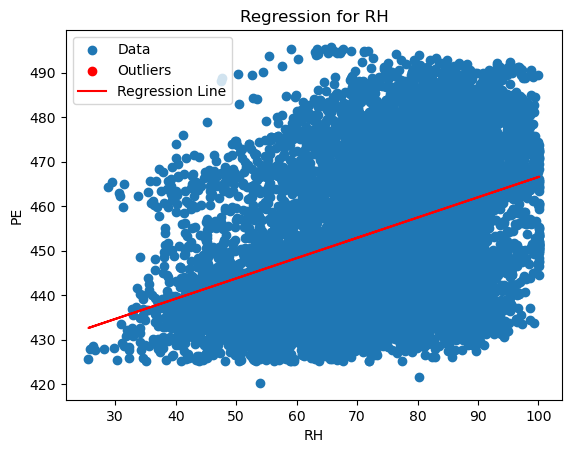

{'AT': -2.171319958517799, 'V': -1.1681351265557134, 'AP': 1.4898716733991115, 'RH': 0.45565010226298047}


In [21]:
import statsmodels.api as sm
univariate_coeff = {}
for predictor in X.columns:
    X_with_const = sm.add_constant(df[predictor])
    model = sm.OLS(y, X_with_const).fit()
    p = model.params
    univariate_coeff[predictor] = p[1]
    print(f"Results for Independent Variable :{predictor}")
    print(model.summary())

    test = model.outlier_test()
    outliers = test[test['bonf(p)'] < 0.05].index.values
    print("Outlier indices:", outliers)

    plt.figure()
    plt.scatter(df[predictor], y, label='Data')
    plt.scatter(df[predictor].iloc[outliers], y[outliers], color = 'r', label ="Outliers")
    plt.plot(df[predictor], model.predict(X_with_const), color='red', label='Regression Line')
    plt.xlabel(predictor)
    plt.ylabel('PE')
    plt.title(f"Regression for {predictor}")
    plt.legend()
    plt.show()

    print("==============================================================================")

print(univariate_coeff)

In [22]:
# Reference: https://www.statology.org/simple-linear-regression-in-python/
# Reference: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.outlier_test.html

#### The R- sqaured value of predictor AT and V are 0.899 and 0.757, that means the predictor AT explains 89.9% of the variance in the dependent variable and the predictor V explains 75.7% of the variance in the dependent variable which means that the model provides a relatively high degree of fit between the predictor AT and the dependent variable and V and the dependent variable as compared to the predictor AP and RH which have their R-squared values 0.269 and 0.152 and explain only 26.9% and 15.2% variance in the dependent variable respectively.  

#### The predictors AT, V and RH have a positive coefficient, which indicates that it has a positive relationship with PE, whereas the predictor AP has a negative coefficient which indicates that it has a inverse relationship with PE  

#### The p value for all the predictor is 0 which is below the threshold 0.05, that means all the predictors are statistically significant for predicting the dependent variable PE.

#### To support our claim, we've illustrated it using scatterplots, where the independent variable is plotted on the X-axis and the dependent variable on the Y-axis. In these scatterplots of the independent variable against the dependent variable, outliers are distinguished by a unique color. For instance, the AT vs PE plot displays nine outliers, while the V vs PE plot shows just one. In contrast, the AP vs PE and RH vs PE plots don't have any outliers. These outliers can be eliminated from the dataset for each regression analysis.

#### I have show the outliers for each predictor using the cooks method


Outlier indices for AT: Index([  21,   61,   87,   89,  121,  126,  140,  142,  199,  202,
       ...
       9375, 9384, 9389, 9431, 9446, 9452, 9475, 9477, 9542, 9559],
      dtype='int64', length=416)


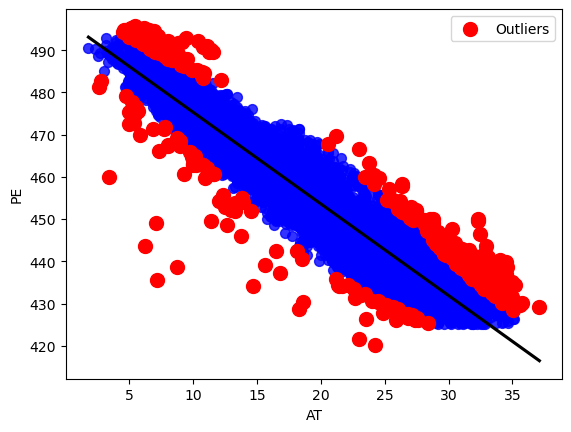

Outlier indices for V: Index([   2,   21,   24,   47,   57,  154,  182,  199,  210,  213,
       ...
       9237, 9248, 9276, 9310, 9335, 9359, 9394, 9404, 9471, 9509],
      dtype='int64', length=423)


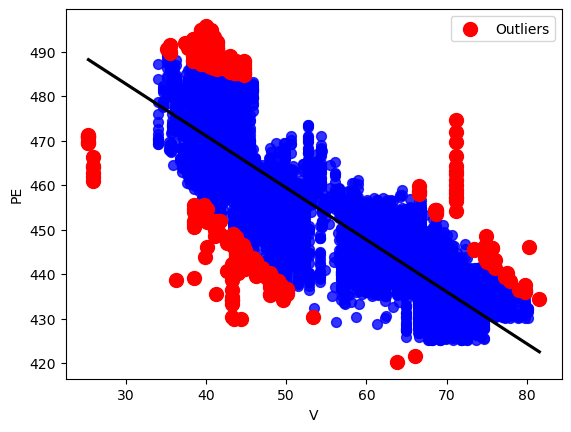

Outlier indices for AP: Index([  21,   22,   57,   74,  114,  154,  191,  198,  199,  252,
       ...
       9237, 9264, 9275, 9310, 9326, 9366, 9459, 9483, 9521, 9542],
      dtype='int64', length=300)


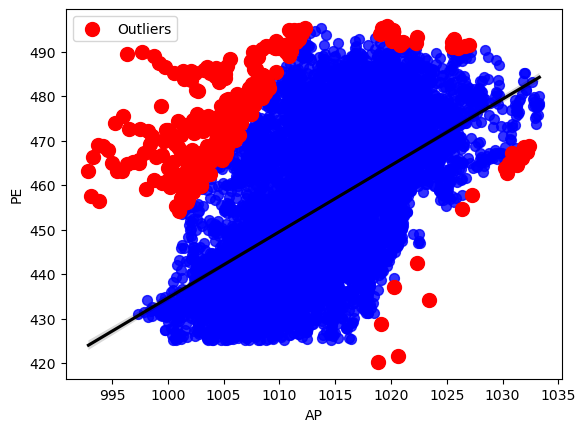

Outlier indices for RH: Index([   8,   15,   16,   21,   48,   57,   82,  115,  154,  199,
       ...
       8953, 9018, 9097, 9115, 9116, 9124, 9204, 9361, 9469, 9495],
      dtype='int64', length=249)


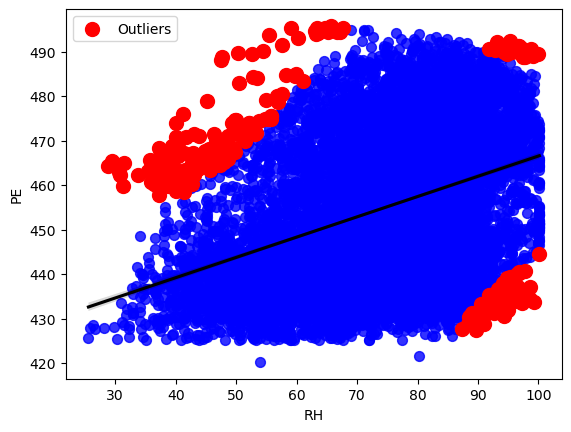

In [23]:
import statsmodels.api as sm

def fit_ols(x, y):
    X = sm.add_constant(x)
    return sm.OLS(y, X).fit()

def detect_outliers_using_cooks_distance(model, threshold):
    influence = model.get_influence()
    cooks = influence.summary_frame()
    return cooks[cooks['cooks_d'] > threshold].index

def plot_with_outliers(x, y, outliers):
    sns.regplot(x=x, y=y, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'k'})
    plt.scatter(x[outliers], y[outliers], color='r', s=100, label='Outliers')
    plt.legend()

for i in df.columns[:4]:
    x = df[i]
    y = df['PE']
    
    model = fit_ols(x, y)
    threshold = 4 / len(x)
    outliers = detect_outliers_using_cooks_distance(model, threshold)
    
    print(f"Outlier indices for {i}:", outliers)
    
    plot_with_outliers(x, y, outliers)
    plt.xlabel(i)
    plt.ylabel('PE')
    plt.show()


## 1. d Multiple regression model

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X = sm.add_constant(X)  # Adds a constant (intercept) to the model
model_multiple = sm.OLS(y, X).fit()  # Fit the regression model
print(model_multiple.summary())
multiple_coefficients = model_multiple.params

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:40:50   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

#### The multiple linear regression model explains approximately 92.9% of the variance in PE with all predictors being statistically significant. For each unit increase in AT, V, and RH, the PE is expected to decrease, while it increases for each unit rise in AP.

#### The p value for all the variables AT, V, AP and RH is 0, which is less than the common significance level which is 0.05 and therefore we can reject null hypothesis H0 :βj = 0 for all the variables which mean that all the variables are statistically significant with the dependent variable PE.

## 1.e Show below are the results from 1c and 1d

In [25]:
print(univariate_coeff)
print(multiple_coefficients)

{'AT': -2.171319958517799, 'V': -1.1681351265557134, 'AP': 1.4898716733991115, 'RH': 0.45565010226298047}
const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64


## Univariate Coefficients:   

In a univariate OLS regression, there is only one predictor used in the model. If you had separate univariate models for each predictor (AT, V, AP, RH), the coefficients you provided initially could be results from such models:

AT: A coefficient of -2.171319958517799 means that for every one-unit increase in Ambient Temperature (AT), there is an average decrease of 2.17 units in the response variable, holding all else constant. This analysis assumes a model where AT is the only predictor.
The other coefficients for V, AP, and RH would be interpreted similarly but in their respective univariate contexts, where each is the only predictor in the model.

## Multivariate Coefficients:  

In a multivariate OLS regression, multiple predictors are included in the same model. Your second set of coefficients likely comes from such a model:

const: The constant term (454.609274) represents the expected value of the response variable when all predictors are 0. It's the intercept of the regression line with the response axis.

AT: A coefficient of -1.977513 indicates that, holding all other variables constant, for every one-unit increase in Ambient Temperature (AT), the response variable is expected to decrease by approximately 1.98 units. This is in the context of other variables being in the model, showing the partial effect of AT.

V (Exhaust Vacuum), AP (Ambient Pressure), and RH (Relative Humidity) are interpreted similarly as partial effects:

V: For each one-unit increase in V, holding other predictors constant, the response variable decreases by 0.233916 units.
AP: For each one-unit increase in AP, the response variable increases by 0.062083 units, with other variables held constant.
RH: For each one-unit increase in RH, the response variable decreases by 0.158054 units, considering the influence of other predictors.

## 1.e Plot

/var/folders/w5/25ybd3_s3bl_qpwqwxvr3s7r0000gn/T/ipykernel_75411/957547115.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text_AT = "{} ({}, {})".format('AT', univariate_coeff['AT'], multiple_coefficients[1])
/var/folders/w5/25ybd3_s3bl_qpwqwxvr3s7r0000gn/T/ipykernel_75411/957547115.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text_V = "{} ({}, {})".format('V', univariate_coeff['V'], multiple_coefficients[2])
/var/folders/w5/25ybd3_s3bl_qpwqwxvr3s7r0000gn/T/ipykernel_75411/957547115.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

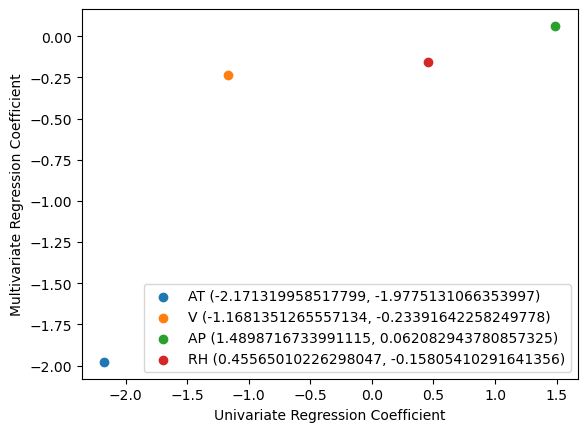

In [26]:
text_AT = "{} ({}, {})".format('AT', univariate_coeff['AT'], multiple_coefficients[1])
text_V = "{} ({}, {})".format('V', univariate_coeff['V'], multiple_coefficients[2])
text_AP = "{} ({}, {})".format('AP', univariate_coeff['AP'], multiple_coefficients[3])
text_RH = "{} ({}, {})".format('RH', univariate_coeff['RH'], multiple_coefficients[4])
plt.scatter(univariate_coeff['AT'], multiple_coefficients[1], label = text_AT)
plt.scatter(univariate_coeff['V'], multiple_coefficients[2], label = text_V)
plt.scatter(univariate_coeff['AP'], multiple_coefficients[3], label = text_AP)
plt.scatter(univariate_coeff['RH'], multiple_coefficients[4], label = text_RH)
plt.rcParams["figure.figsize"] = (10,7)
plt.xlabel('Univariate Regression Coefficient')
plt.ylabel('Multivariate Regression Coefficient')
plt.legend()
plt.show()

Each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

#### 

##  1.f Evidence of non linear  association between any of the predictors and the response

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = 'PE~AT + I(AT**2) + I(AT**3)'
mod_at = smf.ols(formula = formula , data=df)
model = mod_at.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:40:50   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.000     491.409     494.047
AT            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
I(AT ** 2)    -0.1251      0.007    -18.199      0.000      -0.139      -0.112
I(AT ** 3)     0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As p values are small, it gives evidence of the existence of nonlinear association of predictor and response.

In [28]:
formula = 'PE~V + I(V**2) + I(V**3)'
mod_v = smf.ols(formula = formula , data=df)
model = mod_v.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:40:50   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.000     536.209     572.084
V             -2.1444      0.509     -4.214      0.000      -3.142      -1.147
I(V ** 2)     -0.0027      0.009     -0.294      0.768      -0.021       0.015
I(V ** 3)      0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Given a threshold value of 0.05, we can infer that the predictor V^2 has no relationship with the response PE due to its elevated p-value. However, since the p-values for V and V^3 fall below the threshold, it suggests a non-linear relationship between these predictors and the response PE.

In [29]:
formula = 'PE~AP + I(AP**2) + I(AP**3)'
mod_ap = smf.ols(formula = formula , data=df)
model = mod_ap.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:40:50   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.000       0.057       0.092
AP            25.2556      3.001      8.415      0.000      19.372      31.139
I(AP ** 2)    -0.0500      0.006     -8.439      0.000      -0.062      -0.038
I(AP ** 3)  2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As p values are small, it gives evidence of the existence of nonlinear association of predictor and response.

In [30]:
formula = 'PE~RH + I(RH**2) + I(RH**3)'
mod_rh = smf.ols(formula = formula , data=df)
model = mod_rh.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:40:50   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.000     447.744     489.083
RH            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
I(RH ** 2)     0.0321      0.007      4.433      0.000       0.018       0.046
I(RH ** 3)    -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As p values are small, it gives evidence of the existence of nonlinear association of predictor and response.

## 1.g Evidence of Association of interactions of predictors with the response

In [31]:
import statsmodels.formula.api as smf
formula = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + V*AP + RH*AT + V*RH + AP*RH'
mod_pairwise = smf.ols(formula = formula , data=df)
model= mod_pairwise.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:40:50   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
RH:AT         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Using a significance threshold of 0.05, the p-value for AT:AP exceeds this mark, indicating it is not statistically significant. Similarly, both AT and V:RH have p-values that surpass the threshold, suggesting they also lack statistical significance. On the other hand, the features V, AP, RH, AT:V, V:AP, RH:AT, and AP:RH all have p-values within the 0.05 threshold, confirming their statistical significance.

## Enhancing the Regression Model

### Objective
The goal is to explore whether incorporating interaction terms and nonlinear relationships between predictors and the response variable can improve the predictive power of our regression model.

### Methodology
1. **Data Splitting**: The dataset was randomly split into a training set comprising 70% of the data and a testing set with the remaining 30%.
   
2. **Baseline Model Training**: 
   - A baseline regression model was trained using all available predictors on the 70% training subset to establish a performance benchmark.

3. **Nonlinear Model**:
   - Enhanced the model to include quadratic terms for each predictor to capture potential nonlinear effects.
   
4. **Interaction Model**:
   - Further expanded the model to include all possible pairwise interaction terms between predictors, allowing the model to assess if the effect of one predictor on the response variable changes depending on the level of another predictor.

5. **Variable Selection**:
   - Utilized p-values to identify and remove predictors that did not significantly contribute to the model, including careful consideration of interaction terms.

6. **Model Evaluation**:
   - Both the enhanced models (nonlinear and with interaction terms) were evaluated on the training and testing sets.
   - The performance was quantified using Mean Squared Error (MSE), a measure of the model's prediction accuracy.

### Results
- **Baseline Model MSE**: Reported for both training and testing sets to serve as a reference.
- **Nonlinear Model MSE**: Indicated how well the model with quadratic terms performed.
- **Interaction Model MSE**: Showed the performance impact of adding interaction terms.
   
### Conclusion
- By comparing the MSEs of the baseline, nonlinear, and interaction models, we assessed the value added by incorporating complex relationships into the regression model.
- The effectiveness of interaction terms and quadratic nonlinearities in improving model accuracy was quantified, offering insights into the underlying dynamics between predictors and the response variable.



## Train the regression model on a randowmly selected 70% subset of the data with all predictor

In [32]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

train, test = train_test_split(df, test_size=0.3)

X_train = train.iloc[:, :4]
y_train = train['PE']

formula_str = 'PE ~ AT + V + AP + RH'

ols_model = sm.ols(formula=formula_str, data=train).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.180e+04
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:40:50   Log-Likelihood:                -19641.
No. Observations:                6697   AIC:                         3.929e+04
Df Residuals:                    6692   BIC:                         3.933e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    446.3557     11.633     38.371      0.000     423.552     469.159
AT            -1.9684      0.018   -108.371      0.000      -2.004      -1.933
V             -0.2385      0.009    -27.530      0.000      -0.255      -0.221
AP             0.0703      0.011      6.236      0.000       0.048       0.092
RH            -0.1579      0.005    -31.366      0.000      -0.168      -0.148
==============================================================================
Omnibus:                      629.775   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2972.512
Skew:                          -0.343   Prob(JB):                         0.00
Kurtosis:                       6.191   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculate the Mean Sqare Errors for the Train and Test Set

In [33]:
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, :4], df['PE'], test_size=0.3)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

mse_train_1 = mean_squared_error(Y_train, predictions_train)
mse_test_1 = mean_squared_error(Y_test, predictions_test)

print(f"Mean squared Error for training set: {mse_train_1}")
print(f"Mean squared Error for testing set: {mse_test_1}")

selected_mse = mse_test_1


Mean squared Error for training set: 18.84332633893619
Mean squared Error for testing set: 17.86933841992361


##  After removing the insignificant variable using the p-value we run the regression model

In [34]:
interaction_formula = ('PE ~ AT + V + AP + RH + AT*V + AT*AP + RH*AT + V*RH + V*AP + AP*RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2)')

interaction_model = sm.ols(formula=interaction_formula, data=train).fit()

print(interaction_model.summary())

predictions_train_interaction = interaction_model.predict(X_train)
predictions_test_interaction = interaction_model.predict(X_test)

mse_train_2 = mean_squared_error(Y_train, predictions_train_interaction)
mse_test_2 = mean_squared_error(Y_test, predictions_test_interaction)


print(f"Mean squared Error for training set (Interaction Model): {mse_train_2}")
print(f"Mean squared Error for testing set (Interaction Model): {mse_test_2}")

interaction_mse = mse_test_2


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7183.
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:40:50   Log-Likelihood:                -19190.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6682   BIC:                         3.851e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7486.4419   1440.908     -5.196      0.0

## Running the regression model again after removing the insignificant variables using p-value

In [35]:

significant_formula = ('PE ~ AT + V + AP + RH + AT*V + RH*AT + AP*RH + I(AT**2) + I(AP**2) + I(RH**2)')

significant_model = sm.ols(formula=significant_formula, data=train).fit()

print(significant_model.summary())

predictions_train_significant = significant_model.predict(X_train)
predictions_test_significant = significant_model.predict(X_test)

mse_train_3 = mean_squared_error(Y_train, predictions_train_significant)
mse_test_3 = mean_squared_error(Y_test, predictions_test_significant)


print(f"Mean squared Error for training set (Significant Model): {mse_train_3}")
print(f"Mean squared Error for testing set (Significant Model): {mse_test_3}")

significant_mse = mse_test_3


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.004e+04
Date:                Tue, 13 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:40:50   Log-Likelihood:                -19198.
No. Observations:                6697   AIC:                         3.842e+04
Df Residuals:                    6686   BIC:                         3.849e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.036e+04   1110.365     -9.327      0.0

In [36]:
# Define a dictionary for the Mean Squared Errors
mse_data = {
    'Model': ['Baseline Model', 'All Possible Interactions Model', 'Significant Model'],
    'Training Set MSE': [mse_train_1, mse_train_2, mse_train_3],
    'Testing Set MSE': [mse_test_1, mse_test_2, mse_test_3]
}

# Convert the dictionary to a pandas DataFrame
mse_df = pd.DataFrame(mse_data)

mse_df


,Model,Training Set MSE,Testing Set MSE
0,Baseline Model,18.843326,17.869338
1,All Possible Interactions Model,18.416791,17.424716
2,Significant Model,18.437008,17.505910


## 1.i KNN Regression

### KNN on Raw Features

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Splitting the dataset
feature_cols = df.columns[:-1]
X = df[feature_cols]
y = df['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

train_errors = []
test_errors = []

for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(mse_train)
    test_errors.append(mse_test)

optimal_k_train = train_errors.index(min(train_errors)) + 1
optimal_k_test = test_errors.index(min(test_errors)) + 1

print(f"Best k for training data: {optimal_k_train} with MSE: {min(train_errors)}")
print(f"Best k for testing data: {optimal_k_test} with MSE: {min(test_errors)}")


Best k for training data: 1 with MSE: 0.0
Best k for testing data: 6 with MSE: 16.051567429080073


In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

train_errors_normalized = []
test_errors_normalized = []

min_error_norm = float('inf')
best_k_value_norm = None

for k in range(1, 101):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_norm, y_train)
    
    train_preds = knn_regressor.predict(X_train_norm)
    test_preds = knn_regressor.predict(X_test_norm)
    
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    
    train_errors_normalized.append(train_mse)
    test_errors_normalized.append(test_mse)
    
    if test_mse < min_error_norm:
        min_error_norm = test_mse
        best_k_value_norm = k

print(f"Best value of k for normalized data is {best_k_value_norm}")
print(f"Best Test Mean Square Error is {min_error_norm}")



Best value of k for normalized data is 8
Best Test Mean Square Error is 14.652833493882792


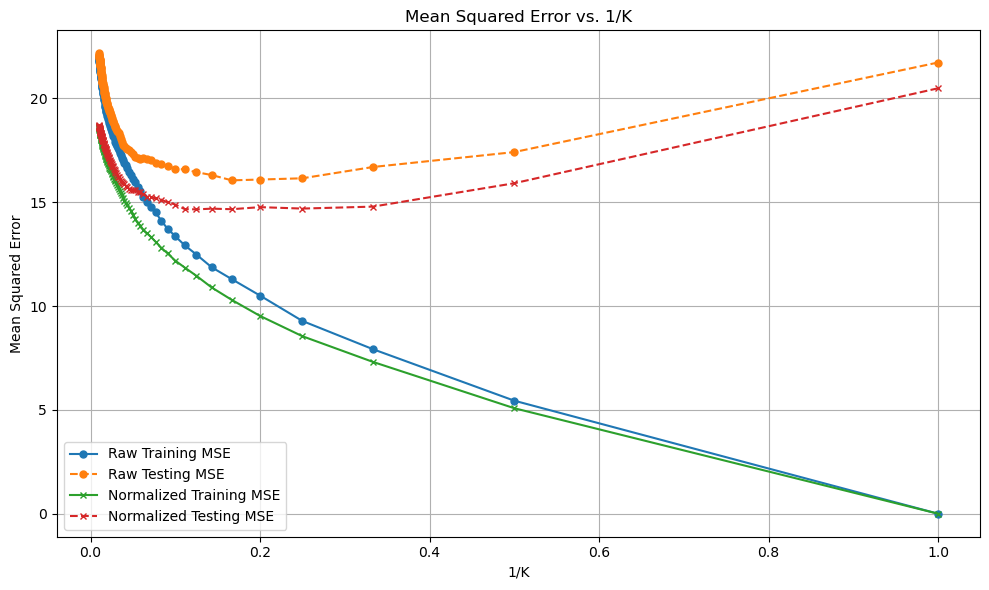

In [39]:
import matplotlib.pyplot as plt

k_values = [1/k for k in range(1, 101)]

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Raw Training MSE', marker='o', markersize=5, linestyle='-')
plt.plot(k_values, test_errors, label='Raw Testing MSE', marker='o', markersize=5, linestyle='--')
plt.plot(k_values, train_errors_normalized, label='Normalized Training MSE', marker='x', markersize=5, linestyle='-')
plt.plot(k_values, test_errors_normalized, label='Normalized Testing MSE', marker='x', markersize=5, linestyle='--')

# Configure the plot
plt.xlabel('1/K')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. 1/K')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


## MSE Trends:  

Training MSE (both raw and normalized) decreases as the number of neighbors decreases (or as 1/K increases). This is expected because with fewer neighbors, the model becomes more complex and fits the training data more closely.
Testing MSE initially decreases as the model complexity increases (fewer neighbors) but then starts to increase after reaching an optimal point of complexity. This pattern indicates overfitting; the model begins to fit the training data too closely and performs worse on the testing data.  

## Normalization Effect:  

The normalized features show a lower MSE for both training and testing datasets compared to the raw features. This suggests that feature normalization improves model performance.
The testing MSE for normalized features increases less sharply than for raw features, indicating better generalization when using normalized data.  

## Optimal K Value:

The optimal K value for the model (the point of minimum testing MSE) can be identified where the testing MSE curve reaches its lowest point before starting to rise again. This is where the model has the right balance between bias and variance.
For normalized features, the optimal K appears to be where 1/K is between 0.1 and 0.2 (implying K is between 5 and 10), as the normalized testing MSE curve flattens out and then begins to rise.
Overfitting:

The sharp increase in the testing MSE for raw features at lower values of K (higher 1/K) suggests overfitting is more pronounced when using raw data.
Underfitting:

At very high values of K (low 1/K), the MSE for both training and testing is high, which may indicate underfitting. The model is too simple and does not capture the underlying patterns in the data well.
Overall Model Performance:

The model using normalized features not only starts with a lower MSE but also shows a more gradual increase in testing MSE as the model complexity increases, implying that normalization makes the model more robust to overfitting.


## Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.


In [96]:
Regression_comparison=pd.DataFrame([min([selected_mse, interaction_mse, significant_mse]), min(test_errors), min(test_errors_normalized)],\
                        index=["Linear Regression Model","KNN Regression Model ","Normalized KNN Regression Model"],\
                        columns=["Testing Data MSE"])
Regression_comparison

,Testing Data MSE
Linear Regression Model,17.446765
KNN Regression Model,16.085734
Normalized KNN Regression Model,14.553668


## Conclusion of Regression Model Performance

The evaluation of the regression models on the testing data, as measured by the Mean Squared Error (MSE), yields the following insights:

- **Linear Regression Model**: Exhibited an MSE of 17.446765, which serves as a baseline for comparison with KNN models. While this model is simple and interpretable, it might not capture more complex patterns in the data as effectively as the KNN models.

- **KNN Regression Model**: With an MSE of 16.085734, the basic KNN model outperforms the linear regression model. This improvement suggests that the KNN model, which captures local patterns in the data, is better suited for this particular dataset.

- **Normalized KNN Regression Model**: Achieved the lowest MSE of 14.553668, indicating the best performance among the three models. The normalization of features likely contributed to a more accurate distance calculation between data points, enhancing the model's ability to generalize from the training data to the testing data.

### Implications
The results indicate that for this specific dataset, the KNN regression model, particularly with normalized features, provides a more accurate prediction of the response variable compared to the linear regression model. The normalization process standardizes the scale of the features, which is crucial for distance-based methods like KNN, leading to improved model performance.
